<a href="https://colab.research.google.com/github/ayuri1512/Data-Science-Projects/blob/main/price_optimization_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/DS/Datasets/Competition_Data.csv

/content/drive/MyDrive/DS/Datasets/Competition_Data.csv


In [4]:
df = pd.read_csv("/content/drive/MyDrive/DS/Datasets/Competition_Data.csv")

In [5]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [6]:
df.dtypes

,0
Index,int64
Fiscal_Week_ID,object
Store_ID,object
Item_ID,object
Price,float64
Item_Quantity,int64
Sales_Amount_No_Discount,float64
Sales_Amount,float64
Competition_Price,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


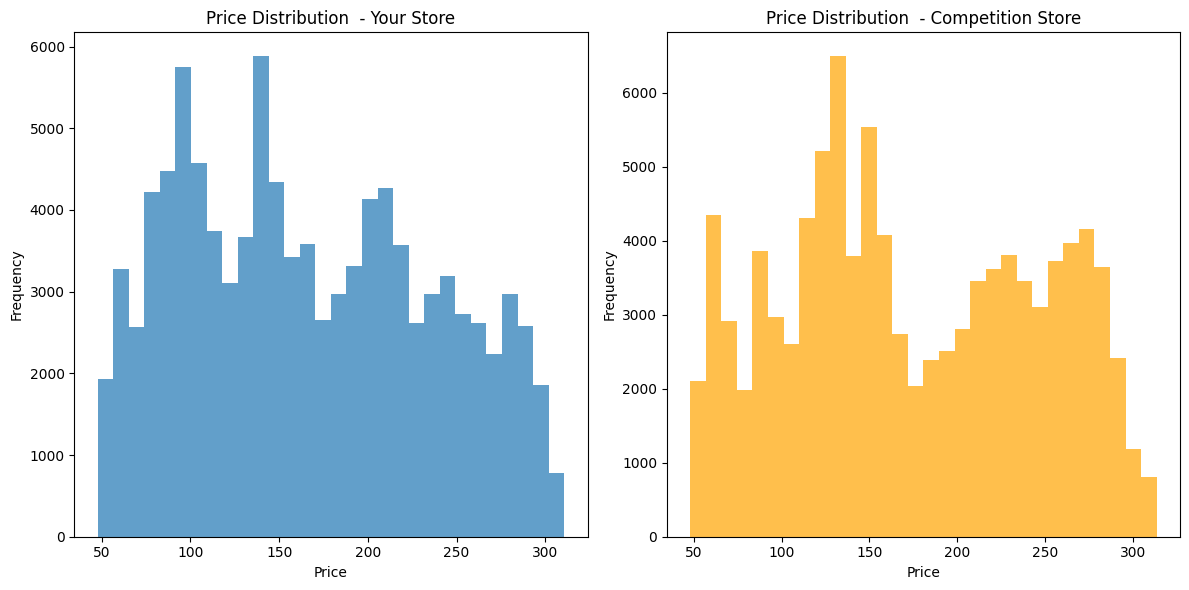

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins = 30, alpha = 0.7, label = 'Your Store')
plt.title('Price Distribution  - Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Competition_Price'], bins = 30, alpha = 0.7, color = 'orange', label = 'Competition Store')
plt.title('Price Distribution  - Competition Store')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

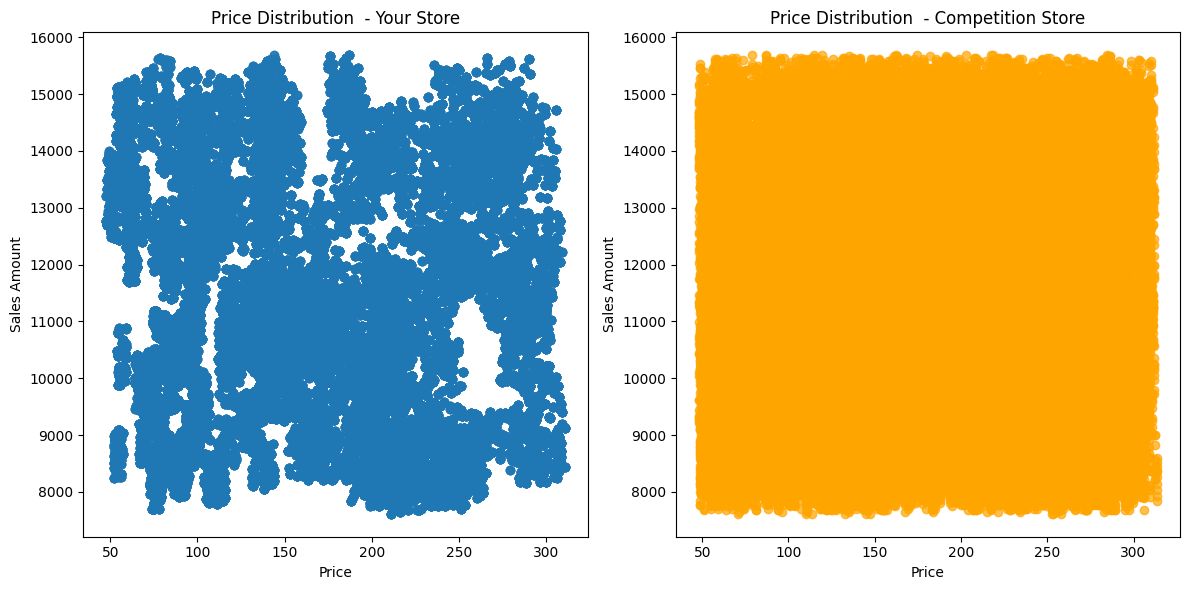

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Price'], df['Sales_Amount'], alpha = 0.7, label = 'Your Store')
plt.title('Price Distribution  - Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')

plt.subplot(1, 2, 2)
plt.scatter(df['Competition_Price'], df['Sales_Amount'], alpha = 0.7, color = 'orange', label = 'Competition Store')
plt.title('Price Distribution  - Competition Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.tight_layout()
plt.show()

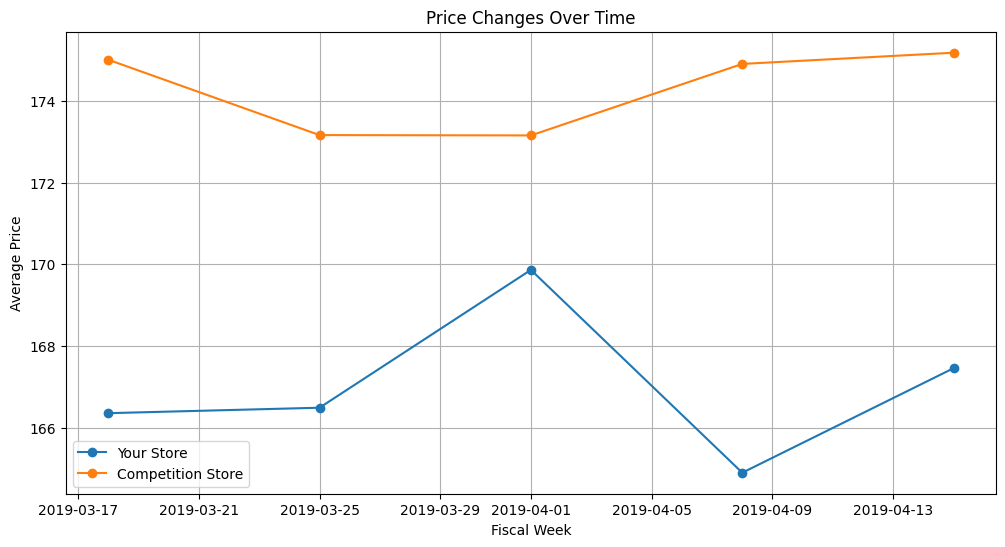

In [10]:
df['Fiscal_Week_ID'] = pd.to_datetime(df['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = df.groupby('Fiscal_Week_ID').agg({
    'Price' : 'mean',
    'Competition_Price' : 'mean'
}).reset_index()

plt.figure(figsize = (12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label = 'Your Store', marker = 'o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label = 'Competition Store', marker = 'o')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title ('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

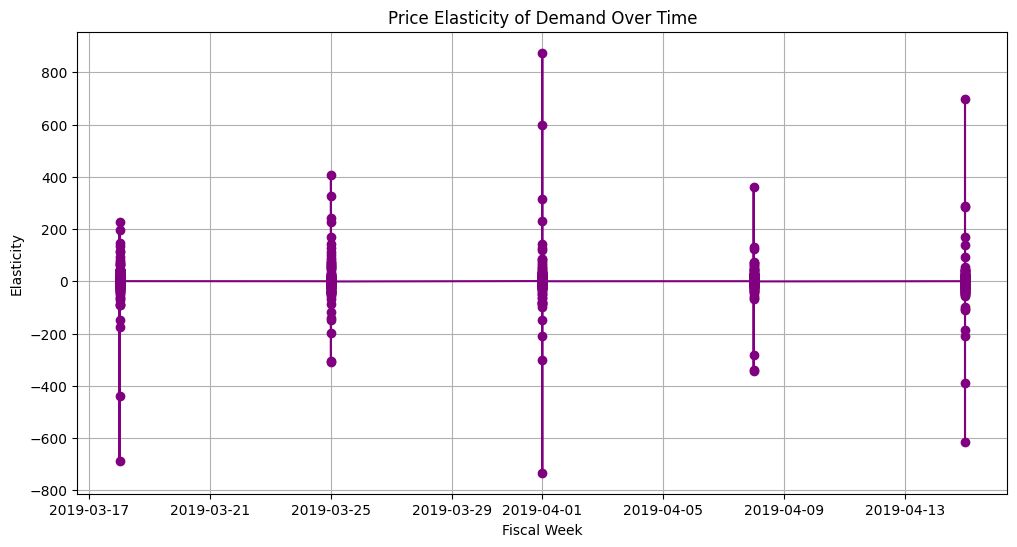

In [11]:
df['price_change'] = df['Price'].pct_change()
df['qty_change'] = df['Item_Quantity'].pct_change()

df['elasticity'] = df['qty_change']/df['price_change']

df.replace([float('inf'), -float('inf')], float('nan'), inplace = True)
df.dropna(subset = ['elasticity'], inplace = True)

plt.figure(figsize = (12, 6))
plt.plot(df['Fiscal_Week_ID'], df['elasticity'], marker = 'o', linestyle = '-', color = 'purple')
plt.xlabel('Fiscal Week')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()


In [14]:
total_sales_your_store = df['Price'].sum()
total_sales_competition = (df['Competition_Price'] * df['Item_Quantity']).sum()

total_qty_your_store = df['Item_Quantity'].sum()
total_qty_competition = df['Item_Quantity'].sum()

summary = pd.DataFrame({
    'Metric' : ['Total Sales Amount' , 'Total Quantity Sold'],
    'Your Store' : [total_sales_your_store, total_qty_your_store],
    'Competition Store' : [total_sales_competition, total_qty_competition]
})

summary

,Metric,Your Store,Competition Store
0,Total Sales Amount,1664632.01,6.962097e+08
1,Total Quantity Sold,3984776.00,3.984776e+06


In [15]:
#define price bracket
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

#create price bracket for your store and competition store
df['price_bracket'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)
df['competiton_price_bracket'] = pd.cut(df['Competition_Price'], bins=bins, labels=labels, right=False)

#calculate sales amount by price bracket for your store
sales_by_bracket_your_store = df.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

#calculate sales amount by price bracket for competition store
df['competition_sales_amt'] = df['Competition_Price'] * df['Item_Quantity']
sales_by_bracket_competition = df.groupby('competiton_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')
sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


Price Optimization with Dynamic Pricing

In [16]:
#segment customer based on purchasing behaviour

#calculate avg price and total qty sold for each segment
item_summary = df.groupby('Item_ID').agg({
    'Price' : 'mean',
    'Item_Quantity' : 'sum'
}).reset_index()

#merge the item summary back to mail dataset
df = pd.merge(df, item_summary, on='Item_ID', suffixes=('', '_avg'))

print(df.columns)

Index(['Index', 'Fiscal_Week_ID', 'Store_ID', 'Item_ID', 'Price',
       'Item_Quantity', 'Sales_Amount_No_Discount', 'Sales_Amount',
       'Competition_Price', 'price_change', 'qty_change', 'elasticity',
       'price_bracket', 'competiton_price_bracket', 'competition_sales_amt',
       'Price_avg', 'Item_Quantity_avg'],
      dtype='object')


In [17]:
#define segment based on avg price
df['segment'] = pd.cut(df['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

#calculate price elasticity for each segement
segments = df['segment'].unique()
elasticity_data = []

for segment in segments:
  segment_data = df[df['segment'] == segment]
  segment_data['price_change'] = segment_data['Price'].pct_change()
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
  segment_data['elasticity'] = segment_data['qty_change']/segment_data['price_change']
  segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace =True)
  avg_elasticity = segment_data['elasticity'].mean()
  elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


In [18]:
#creating the copy of the data set for stimulation
dynamic_df = df.copy()

In [20]:
#apply dynamic pricing rules
dynamic_df.loc[dynamic_df['segment'] == 'Medium', 'dynamic_price'] = dynamic_df['Price'] * 1.05
dynamic_df.loc[dynamic_df['segment'] == 'High', 'dynamic_price'] = dynamic_df['Price'] * 0.90

#calculate the new sales amounts base on dynamic prices
dynamic_df['dynamic_sales_amt'] = dynamic_df['dynamic_price'] * dynamic_df['Item_Quantity']

#compare total sales amount between existing and dynamic pricing
total_sales_existing = df['Sales_Amount'].sum()
total_sales_dynamic = dynamic_df['dynamic_sales_amt'].sum()

#compare total quantity sold between existing and dynamic pricing
total_qty_existing = df['Item_Quantity'].sum()
total_qty_dynamic = dynamic_df['Item_Quantity'].sum()

comparison_summary = pd.DataFrame({
    'Metrics' : ['Total Sales Amount', 'Total Qty Sold'],
    'Existing Pricing' : [total_sales_existing, total_qty_existing],
    'Dynamic Pricing' : [total_sales_dynamic, total_qty_dynamic]

})

comparison_summary

,Metrics,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Qty Sold,3.984776e+06,3.984776e+06


In [21]:
df['dynamic_price'] = dynamic_df['dynamic_price']

In [22]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competiton_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium,143.6295
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium,145.6035
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium,135.3765
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Medium,141.1725
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Medium,140.8365


*The dynamic pricing strategy results in a significantly higher total sales amount compare to the existing pricing stratergy. This indicates that the dynamic pricing statergy is more effective in maximizing revenue*